# Building a model.

#### Task 1: Build a regression model using Python’s `statsmodels` module that demonstrates a relationship between the number of bikes in a particular location and the characteristics of the POIs in that location.  

In [38]:
# First, let's import our libraires:

import requests
from IPython.display import JSON 
import pandas as pd
import numpy as np
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization
%matplotlib inline
sns.set(color_codes = True)
import statsmodels.api as sm 

Before starting to building our model, let's explore the datasets with the use of *descriptive statistics* followed by our hypothesis testing. The Pearson's correlation hypothesis testing was chosen as our guidance as we would like to find out if there is a correlation between the variable *free bikes* (our dependent variable) and *rating* or *review count* (our independent variables). We might also add, dependending of our analysis goes, other independent variables such as *latitude* and *longitude*. 

Just as an overview, these are the hypothesis:

H0: There isn't a relationship between the variable free bikes and popular POIs (most rated and reviewed) POIs found in the area.

Ha: There is a relationship between the variable free bikes and popular (most rated and reviewed) POIs found in the area.

*For popular, it was used the rating and review count variables.*

Before moving forward into the hypothesis testing, let's dig a little bit in data exploration analysis by interpreting the results of the descriptive statistics. As we know, descriptive statistics can give us a brief overview of the dataset we are dealing with, including some measures and features of the sample.

Obs.: As already pointed out at the beginning of this project, we are working with the sample of our stations population; so the POIs from Foursquare and Yelp were retrieved considering the sample geolocation and not the whole population. 

In [56]:
# Let's open our datasets starting with our list of stations:        

df_city_bikes_recife_network_sample = pd.read_csv("df_city_bikes_recife_network_sample.csv")

df_city_bikes_recife_network_sample = df_city_bikes_recife_network_sample.drop(['Unnamed: 0', 'Id', 'Payment', 'Timestamp', 'Last Updated', 'Payment Terminal'], axis=1)

df_city_bikes_recife_network_sample.to_csv("df_city_bikes_recife_network_sample.csv", index=False)


In [57]:
display(df_city_bikes_recife_network_sample)


,Uid,Name,Address,Empty Slots,Free Bikes,Renting Bikes,Returning Bikes,Latitude,Longitude
0,56,56 - R. Bernardino Soares da Silva,"Rua Bernardino Soares da Silva, em frente ao n...",10,1,1,1,-8.044389,-34.890618
1,75,75 - Alberto Lundgren,"Av Ministro Marcos Freire, na calçada oposto a...",13,1,1,1,-8.002349,-34.839632
2,61,61 - Segundo Jardim,"Av. Boa Viagem, oposto ao 1590, baia de estaci...",21,6,1,1,-8.105086,-34.886842
3,23,23 - SESC Santo Amaro,"Praça do Campo Santo, oposto ao SESC / esquina...",17,2,1,1,-8.049770,-34.882830
4,4,4 - Boulevard Rio Branco,"Av. Rio Branco, entre a Rua do Apolo e Rua da ...",11,12,1,1,-8.062496,-34.872956
5,13,13 - Tortura Nunca Mais,Av Mário Melo lateral do Tribunal de Contas do...,17,0,1,1,-8.056160,-34.878349
6,57,57 - R. Alfredo de Medeiros,Rua Alfredo de Medeiros em frente ao número 44...,5,5,1,1,-8.041909,-34.890879
7,116,85 - Hospital Agamenon Magalhães,"Rua São Vicente, oposto ao número 100. Em fren...",3,11,1,1,-8.029370,-34.906410
8,122,45 - Praça da Torre,"Praça Prof. Barreto Campêlo, oposto ao 1189, n...",10,4,1,1,-8.047194,-34.914150


In [46]:
# And our dataset with only the pois retrieved from FSQ and Yelp:

df_fsq_and_yelp_pois_parsed_and_grouped_by_name = pd.read_csv("df_fsq_and_yelp_pois_parsed_and_grouped_by_name.csv")
display(df_fsq_and_yelp_pois_parsed_and_grouped_by_name)

,Name,Distance,Rating,Review Count,Latitude,Longitude
0,Academia Corpore,291.0,0.0,0.0,-8.049831,-34.914409
1,Altar Cozinha Ancestral,447.0,0.0,0.0,-8.046033,-34.881433
2,Açaí,518.0,0.0,0.0,-8.051654,-34.887046
3,Baillar Escola de Dança,644.0,0.0,0.0,-8.047550,-34.888216
4,Bar do Neno,526.0,0.0,0.0,-8.032669,-34.909412
...,...,...,...,...,...,...
186,Wiella Bistrô,0.0,4.5,3.0,-8.100730,-34.887611
187,Winner Sports Bar,0.0,4.5,5.0,-8.047380,-34.893791
188,Yantai Express,0.0,3.0,6.0,-8.032550,-34.904148
189,ZEN,0.0,3.5,13.0,-8.044134,-34.892897


In [47]:
# And one more dataset with information joined with citybikes, api and yelp:

df_city_bikes_recife_network_with_fsq_and_yelp = pd.read_csv("df_city_bikes_recife_network_with_fsq_and_yelp.csv")
display(df_city_bikes_recife_network_with_fsq_and_yelp) 

,Uid,Name,Empty Slots,Free Bikes,Renting Bikes,Returning Bikes,Latitude,Longitude,Rating,Review Count
0,56,56 - R. Bernardino Soares da Silva,10.0,1,1,1,0.000000,0.000000,0.0,0
1,75,75 - Alberto Lundgren,13.0,1,1,1,0.000000,0.000000,0.0,0
2,61,61 - Segundo Jardim,21.0,6,1,1,0.000000,0.000000,0.0,0
3,23,23 - SESC Santo Amaro,17.0,2,1,1,0.000000,0.000000,0.0,0
4,4,4 - Boulevard Rio Branco,11.0,12,1,1,0.000000,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...
195,0,Wiella Bistrô,0.0,0,0,0,-8.100730,-34.887611,4.5,3
196,0,Winner Sports Bar,0.0,0,0,0,-8.047380,-34.893791,4.5,5
197,0,Yantai Express,0.0,0,0,0,-8.032550,-34.904148,3.0,6
198,0,ZEN,0.0,0,0,0,-8.044134,-34.892897,3.5,13


#### Step 1: Formulating Statistical Analysis and Hypothesis Testing

In [58]:
# Let's proceed with the summary of statistics of our merged (and last) dataset (df_city_bikes_recife_network_with_fsq_and_yelp):

df_city_bikes_recife_network_with_fsq_and_yelp.describe()

,Uid,Empty Slots,Free Bikes,Renting Bikes,Returning Bikes,Latitude,Longitude,Rating,Review Count
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000
mean,2.635000,0.535000,0.210000,0.045000,0.045000,-7.689507,-33.319012,2.7725,3.105000
std,14.767266,2.732418,1.305535,0.207824,0.207824,1.673559,7.250811,2.1698,3.311921
min,0.000000,0.000000,0.000000,0.000000,0.000000,-8.112480,-34.936516,0.0000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-8.060302,-34.902252,0.0000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,-8.047524,-34.888787,4.0000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,-8.037129,-34.878793,4.5000,5.000000
max,122.000000,21.000000,12.000000,1.000000,1.000000,0.000000,0.000000,5.0000,17.000000


From our research and reading of the descriptive statistics, it might be accurate to assume that:
    
- There is no more non-null or missing values in the columns (information given by the count parameter);
- The average of the variables *empty slots* (0.535000), *free bikes* (0.210000), *renting bikes* (0.045000) and *returning bikes* (0.045000) are low and the three last ones are closer to 0. This might indicate that they have a low average and also point out that there are very few bikes available for rent (free bikes) or being rented (reting bikes) or returned (returning bikes) at the bike sharing stations;
- The standard deviation of the *empty slots* is bigger than the *free bikes*, and the std of the *review count* is bigger than the *rating*. This might mean that the values for the *empty slots* are more spread out than the ones from the *free bikes*, and the ones from the *review count* are also more spread out than the ones from the *rating*. So the variables *free bikes* and *rating* might be a little bit more closer to the mean;
- As there is a station with a higher number of *free bikes* (12) and this might be considered an outlier because it is very far from the mean of the *free bikes*. If we came back to our first dataset, it is noted that the station uid 4 (4 - Boulevard Rio Branco) has 12 free bikes and the station uid 116 (85 - Hospital Agamenon Magalhães) has 11:

In [63]:
# Checking the stations uid number that might be outliers:

free_bikes_uid_filtered_by_available_bikes = df_city_bikes_recife_network_sample["Free Bikes"] > 10
filtered_df_by_free_bikes_pot_outliers = df_city_bikes_recife_network_sample[free_bikes_uid_filtered_by_available_bikes]
display(filtered_df_by_free_bikes_pot_outliers)

,Uid,Name,Address,Empty Slots,Free Bikes,Renting Bikes,Returning Bikes,Latitude,Longitude
4,4,4 - Boulevard Rio Branco,"Av. Rio Branco, entre a Rua do Apolo e Rua da ...",11,12,1,1,-8.062496,-34.872956
7,116,85 - Hospital Agamenon Magalhães,"Rua São Vicente, oposto ao número 100. Em fren...",3,11,1,1,-8.029370,-34.906410


- Coming back to our summary of statistics, it is noted that the variable *review count* indicates that one of the POIs have received a higher count of *reviews*. The poi *Bar Central* and *Spettus Steak House* are very popular POI in the city and this was the one which received the higher count of reviews (17);
- Finally, the station which had the max number of  *empty slots* (21) available to store the bikes being returned by their users might be considered an outlier as it is very far from the mean of 0.535000.

Obs.: Considering the text analytics interpretation from the news, even though this might be a little out of scope of this project, it might be relevant for future purposes to analyze the representation of the neighborhoods where the station uid 4 and uid 116 (spotted as possible outliers) are located: whereas the uid 4 is located closer to one of the biggest public hospitals in the city, the uid 116 station is in a popular area closer to theaters but nonetheless described by not being safe to be around in comparison to other neighborhoods because there is a significative amount of people in the streets in that area.

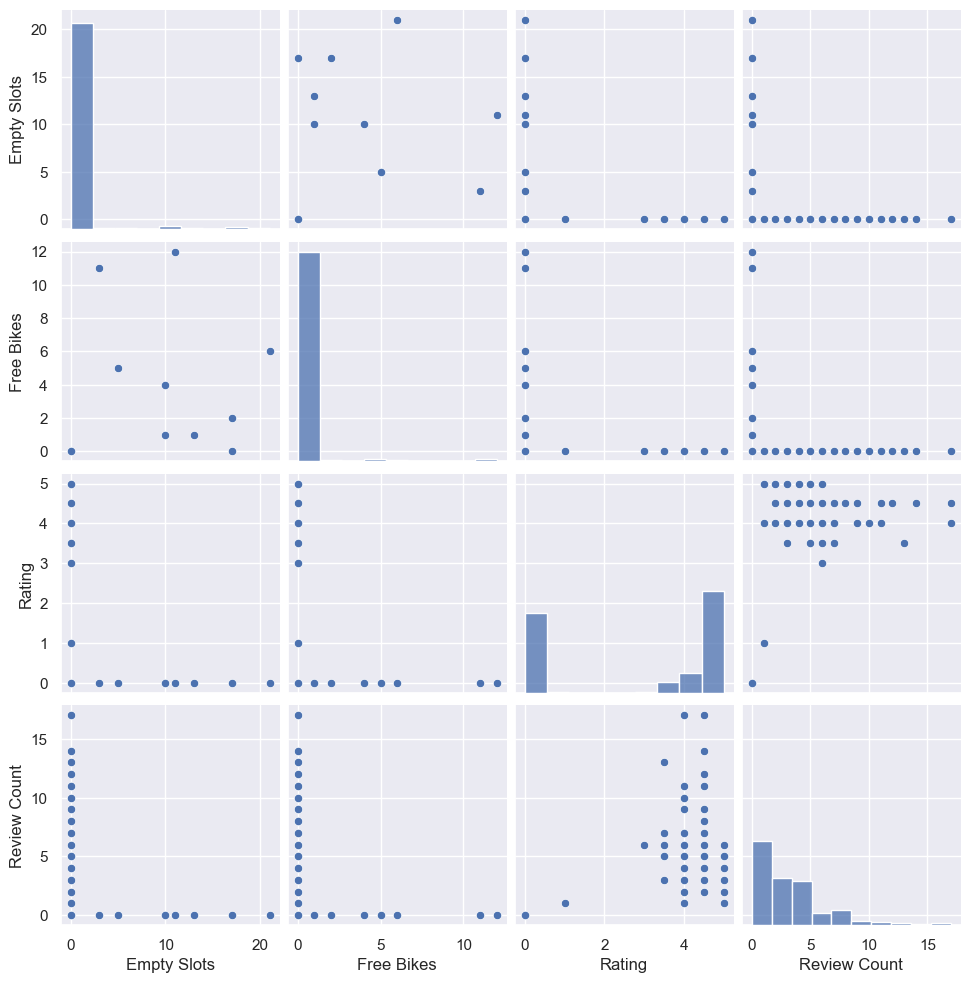

In [65]:
# Now, let's try to explore more the relationship between these variables with the help of a pairplot:

import seaborn as sns

sns.pairplot(df_city_bikes_recife_network_with_fsq_and_yelp[["Empty Slots", "Free Bikes", "Rating", "Review Count"]])


By analyzing this pairplot, it seems that the variables *free bikes* and *empty slots* when seen in a pair in a graph are very spread out. As well, it seems that while the empty slots get higher (at the stations with a higher amount of slots to be returned bikes) is negative correlated with the *rating* and *review count* variables. So this can be an indicator that the stations with a high amount of empty slots don't have many people around and circulating in the area.

Also, it seems that there is a negative correlation between the variables *free bikes* and the *rating* and *review count* of the POIs. So let's plot these variables separately to take a look closer at them:


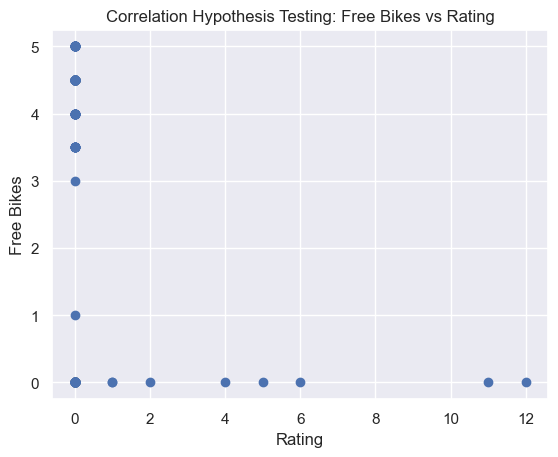

In [66]:
# The variables to be analyzed are free bikes x rating:
free_bikes = df_city_bikes_recife_network_with_fsq_and_yelp["Free Bikes"]
rating = df_city_bikes_recife_network_with_fsq_and_yelp["Rating"]

# Then, let's do our  scatter plot:
plt.scatter(free_bikes, rating)

# Some labels and title to add on it:
plt.xlabel('Rating')
plt.ylabel('Free Bikes')
plt.title('Correlation Hypothesis Testing: Free Bikes vs Rating')

# Let's show the plot:
plt.show()

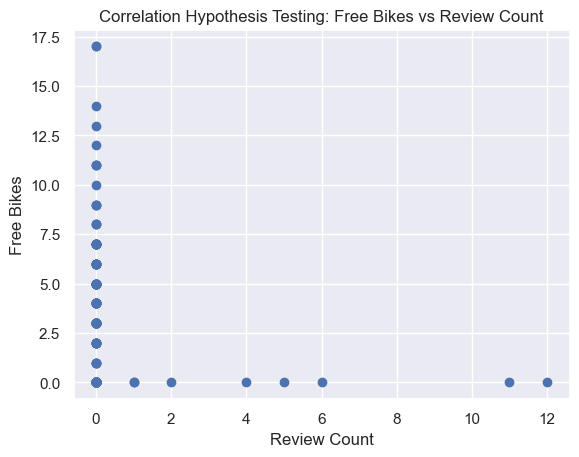

In [67]:
# The other variables to be analyzed are free bikes x review count:
free_bikes = df_city_bikes_recife_network_with_fsq_and_yelp["Free Bikes"]
review_count = df_city_bikes_recife_network_with_fsq_and_yelp["Review Count"]

# Then, let's do our  scatter plot:
plt.scatter(free_bikes, review_count)

# Some labels and title to add on it:
plt.xlabel('Review Count')
plt.ylabel('Free Bikes')
plt.title('Correlation Hypothesis Testing: Free Bikes vs Review Count')

# Let's show the plot:
plt.show()

To analyze those graphs, let's first think about what represents the variables *rating* and *review count*: those are two possible parameters that could increase the popularity of a POI and the interest of the users to go to a specific place. 

Also, the category *review count* is a discrete variable because its data type was changed during the data cleaning (it was a float64 and was transformed to become an integer8 to also use less memory and give more accuracy to our analysis). So this variable can only take on integer values. On the other hand, *rating* is an interval variable (I haven't converted this data type to an integer because I found that it would lose some of the qualities of an object that is being rated (such as the decimals, and, in terms of business, every decimal counts!). Therefore, as rating can be in our case an interval value, the output is not precise and might influence the analysis of the correlation and then can influence our model. So, it is important to highlight that he output would also be different if rating were a categorical data type based on expressions such as "Excellent", "Very Good", "Good" and so on. For now, I am considering rating as an interval value.


So those graphs of *scatter plots* between the variables x (our selected independent variables was first the *rating* and, after, the *review count*) and y (our dependent variable which is *free bikes*) helped us to see more of our data in order to find out the type of its distribution and correlation.


In [129]:
# Now, let's consider calculating the mean of our stations by some variables to see if those variables could be used in our model:

# Let's get some mean and values to analyze from our city bikes stations and pois:
mean_st_free_bikes, mean_st_empty_slots = df_city_bikes_recife_network_sample[['Free Bikes', 'Empty Slots']].mean()
mean_pois_review, mean_pois_rating = df_fsq_and_yelp_pois_parsed_and_grouped_by_name[['Review Count', 'Rating']].mean()

# And print the means:
print("The mean of free bikes is:", mean_st_free_bikes)
print("The mean of empty slots is:", mean_st_empty_slots)
print("The mean of pois rating is:", mean_pois_review)
print("The mean of pois review is:", mean_pois_rating)


The mean of free bikes is: 4.666666666666667
The mean of empty slots is: 11.88888888888889
The mean of pois rating is: 3.25130890052356
The mean of pois review is: 2.9031413612565444


In [144]:
# Let's check if there are free bikes and empty slots more spread out from the mean:

free_bikes_uid_filtered_by_available_bikes_and_empty_slots = (df_city_bikes_recife_network_sample['Free Bikes'] >= 4) & (df_city_bikes_recife_network_sample['Empty Slots'] >= 11)
selected_stations_rows = free_bikes_uid_filtered_by_available_bikes_and_empty_slots
display(selected_stations_rows)


0    False
1    False
2     True
3    False
4     True
5    False
6    False
7    False
8    False
dtype: bool

This confirms that there are 2 outliers in our sample of stations in Recife. 

In [148]:
# Let's check if there are pois with a lower rating and review count:

mean_of_pois_l_rating_and_review = (df_fsq_and_yelp_pois_parsed_and_grouped_by_name['Rating'] < 3.25) & (df_fsq_and_yelp_pois_parsed_and_grouped_by_name['Review Count'] < 3)
selected_pois_rows = df_fsq_and_yelp_pois_parsed_and_grouped_by_name[mean_of_pois_l_rating_and_review]
df_of_pois_less_rating_and_review = selected_pois_rows
display(df_of_pois_less_rating_and_review)
df_of_pois_high_rating_and_review.count()


,Name,Distance,Rating,Review Count,Latitude,Longitude
0,Academia Corpore,291.0,0.0,0.0,-8.049831,-34.914409
1,Altar Cozinha Ancestral,447.0,0.0,0.0,-8.046033,-34.881433
2,Açaí,518.0,0.0,0.0,-8.051654,-34.887046
3,Baillar Escola de Dança,644.0,0.0,0.0,-8.047550,-34.888216
4,Bar do Neno,526.0,0.0,0.0,-8.032669,-34.909412
...,...,...,...,...,...,...
71,Ta San Yuen,403.0,0.0,0.0,-8.041178,-34.894503
72,Teatro Marco Camarotti,124.0,0.0,0.0,-8.049542,-34.882614
73,Teatro de Santa Isabel,667.0,0.0,0.0,-8.060810,-34.878248
74,Villa Sandino,671.0,0.0,0.0,-8.048720,-34.894997


Name            77
Distance        77
Rating          77
Review Count    77
Latitude        77
Longitude       77
dtype: int64

In [165]:
# Let's check if there are pois with a higher rating and review count:

mean_of_pois_h_rating_and_review = (df_fsq_and_yelp_pois_parsed_and_grouped_by_name['Rating'] > 3.25) & (df_fsq_and_yelp_pois_parsed_and_grouped_by_name['Review Count'] > 3)
selected_pois_rows = df_fsq_and_yelp_pois_parsed_and_grouped_by_name[mean_of_pois_h_rating_and_review]
df_of_pois_high_rating_and_review = selected_pois_rows
display(df_of_pois_high_rating_and_review)
df_of_pois_high_rating_and_review.count()


,Name,Distance,Rating,Review Count,Latitude,Longitude
21,Cioccolatte Gelateria,209.0,5.0,4.0,-8.062421,-34.871131
25,Dalena,786.0,4.5,9.0,-8.047569,-34.897101
32,Entre Amigos Praia,827.0,4.0,10.0,-8.098265,-34.884039
50,Papaya Verde,448.0,4.5,4.0,-8.045248,-34.893030
51,Parque Santana,765.0,5.0,4.0,-8.040998,-34.916865
...,...,...,...,...,...,...
182,Vaporetto Container Bar,0.0,4.5,9.0,-8.040021,-34.912763
185,Vovó Nice,0.0,5.0,4.0,-8.045290,-34.907230
187,Winner Sports Bar,0.0,4.5,5.0,-8.047380,-34.893791
189,ZEN,0.0,3.5,13.0,-8.044134,-34.892897


Name            77
Distance        77
Rating          77
Review Count    77
Latitude        77
Longitude       77
dtype: int64

So there are about 66 POIs with less (or not) rating and review count than the mean and 77 POIs with a rating and review count higher than the mean. This data could be also considered as part of our regression model in order to analyze if there is a correlation between the *free bikes* variable (dependent variable) and the *rating* and *review count* variables (independent variables). In other words, to see if the stations where can be found more free bikes and empty slots to returned them are correlated with areas that have POIs with less rating or popularity so more bikes will be available whereas in areas with popular POIs the competition for free bikes would be harder. For the model, we are going to use the forward selection strategy and our joined dataset (df_city_bikes_recife_network_with_fsq_and_yelp).


#### Step 2. Building Regression Models and Evaluating the Models Fitting: *What is the output of the statistical analysis?*

In [176]:
# Now, let's go to create our multiple linear regression model.
# For this model, the * free bikes* is going to be our y-variable (dependent variable).
# First, let's start with assessing our 2 independent variables that are "rating" and "review count":

x = df_city_bikes_recife_network_with_fsq_and_yelp[["Rating", "Review Count"]]
y = df_city_bikes_recife_network_with_fsq_and_yelp["Free Bikes"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()                                 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Free Bikes   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     4.412
Date:                Tue, 31 Jan 2023   Prob (F-statistic):             0.0134
Time:                        21:54:14   Log-Likelihood:                -332.23
No. Observations:                 200   AIC:                             670.5
Df Residuals:                     197   BIC:                             680.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5562      0.148      3.765      0.000       0.265       0.848
Rating          -0.1163      0.057     -2.024      0.044      -0.230      -0.003
Review Count    -0.0076      0.038     -0.203      0.839      -0.082       0.067
==============================================================================
Omnibus:                      301.507   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26702.105
Skew:                           7.059   Prob(JB):                         0.00
Kurtosis:                      57.817   Cond. No.                         9.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the analysis of the multiple linear regression model above, it looks like that the adj r-squared of 0.033 is very low. This means this might not be a good model to analyze the correlation between our 3 variables: free bikes with rating and review count. So this regression model might explain a very small portion of the variation in the response variable of *free bikes*. So, this regression may not be a good fit for the data and not useful for making predictions. 

At the same time, let's analyze the *p-values* since the adjusted r-square doesn't give everything. 

The p-value for each variable tests the null hypothesis that there is no correlation (the status-quo hypothesis). A small p-value such as 0.044 (typically less than 0.05) indicates strong evidence against the null hypothesis, which suggests that the corresponding predictor variable, in this case, the *rating* variable might have a significant effect on the response variable (the *free bikes*). On the other hand, the review count variable has a p-value of 0.839, which is greater than 0.05, indicating that there is not enough evidence to reject the null hypothesis according to this parameter; and the *review count* variable may not have a significant effect on the dependent variable *free bikes*. 

In regards of the *skewness*, the value of 7.059 indicated that the distribution of the data is more skewed to the right, so we have more data points in the right side (positive skew). This can indicate that the distribution is not normal and might be influenced by outliers. As we have seen, we found at least 2 outliers in our sample in the analysis above. Also, it is noted that the *kurtosis* value of 57.817 indicates that the distribution of the data is very peaked. This suggests, again, that there are more outliers to be seen of.

Bringing out the *coefficient*, it is noted that for the rating variable it is -0.1163. This means that while the rating increases, the free bikes decrease as we are hypothesizing in our alternative hypothesis. Similarly, this indicates the direction of the relationship between the independent (rating) and dependent variable (free bikes). A negative coefficient for the rating variable suggests that there is a negative relationship between the rating and the response variable, which means that as the rating increases, the response variable decreases (the bikes available to be rented). Also, in this case, the coefficient for the review count variable is -0.0076. This means that for a one increase in the review count, the response variable is expected to decrease by 0.0076 units. And, by one increase in the rating done by the users of POIs, the response variable (free bikes) is expected to decrease by 0.1163. 


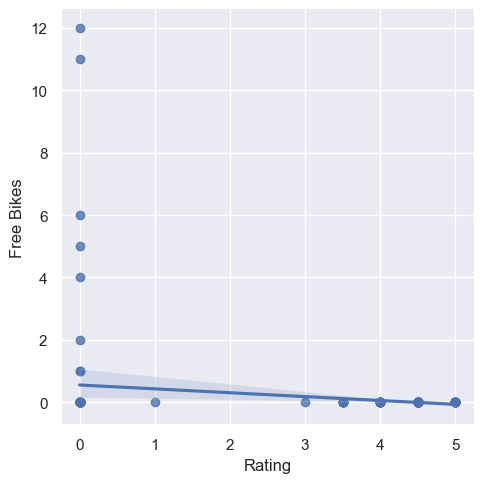

In [182]:
# Let's now visualize our linear regression model using the 'lmplot' function from Seaborn:

sns.lmplot(x='Rating', y='Free Bikes', data=df_city_bikes_recife_network_with_fsq_and_yelp)

plt.show()

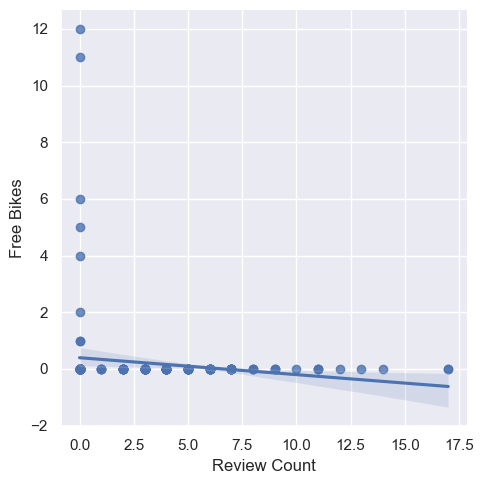

In [183]:
# And let's add to this visualization our review count variable:

sns.lmplot(x='Review Count', y='Free Bikes', data=df_city_bikes_recife_network_with_fsq_and_yelp)

plt.show()

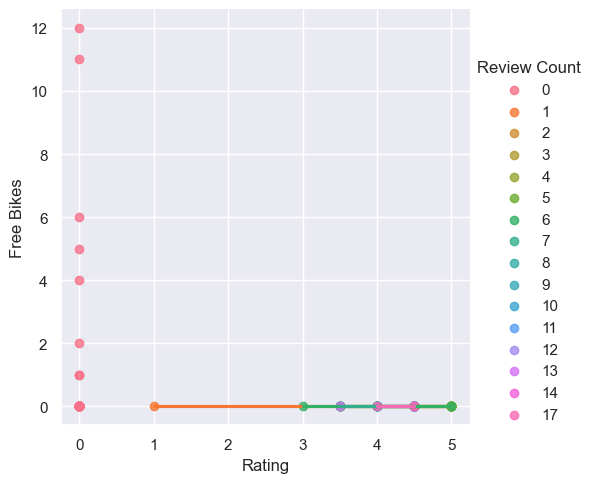

In [191]:
# Let's now visualize our linear regression model using the 3 variables above:

sns.lmplot(x='Rating', y='Free Bikes', hue='Review Count', data=df_city_bikes_recife_network_with_fsq_and_yelp)

plt.show()

With those visualizations, it is still not clear if there is a correlation between *free bikes*, *rating* and *review count*. However, at the same time, it is possible to see a pattern between those variables: the higher number of ratings and reviews marked by the x=axis connect with a 0 amount of free bikes in the y-axis. So there is something between those variables to be understood.

let's go a little more deeper and add another variable to evaluate the fit of our model.

In [192]:
# Now, let's go to create our multiple linear regression model considering now another variable that is empty slots:

x = df_city_bikes_recife_network_with_fsq_and_yelp[["Rating", "Review Count", "Empty Slots"]]
y = df_city_bikes_recife_network_with_fsq_and_yelp["Free Bikes"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Free Bikes   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     29.03
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.42e-15
Time:                        23:09:40   Log-Likelihood:                -299.84
No. Observations:                 200   AIC:                             607.7
Df Residuals:                     196   BIC:                             620.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1962      0.133      1.479      0.141      -0.065       0.458
Rating          -0.0410      0.050     -0.824      0.411      -0.139       0.057
Review Count    -0.0027      0.032     -0.084      0.933      -0.066       0.061
Empty Slots      0.2541      0.029      8.658      0.000       0.196       0.312
==============================================================================
Omnibus:                      292.449   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31587.815
Skew:                           6.526   Prob(JB):                         0.00
Kurtosis:                      63.168   Cond. No.                         9.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this model the adjusted r-squared got a little bit higher: it is now 0.297 (in the previous model, it was 0.033).

The coefficients of *rating* and *review count* are still negative which keeps pointing out for a negative correlation between these independent variables and our dependend variable. In this model, the effect of the *rating* might have increased in regards of decreasing the number of bikes because it is lower than the previous one. In other words, when the rating or review count of POIs increase, the amount of available bikes decrease. 

Also, the skew and kurtosis of our distribution are positive and similar to the first model (just a bit higher) which indicates that our distribution possible has outliers concentrated at the peak of our shape (kurtosis) and in the left side of our graph (positive skew).

In regards of the p-value of the empty slots, this value is 0. This means that this variable might have some significance in our model.


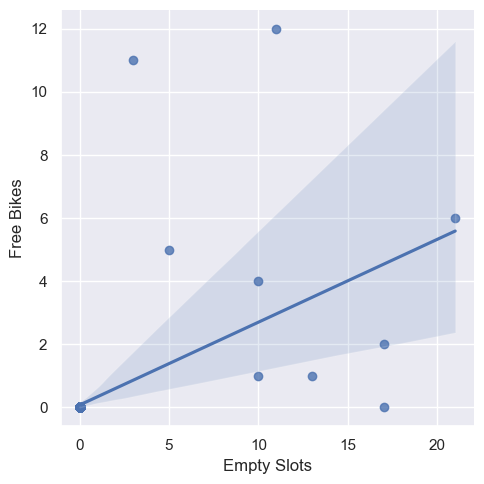

In [193]:
# Let's now visualize our linear regression model using first "empty slots" and "free bikes" variables above:

sns.lmplot(x='Empty Slots', y='Free Bikes', data=df_city_bikes_recife_network_with_fsq_and_yelp)

plt.show()

From this graph, we can see there is a positive correlation between the amount of bikes available to be rent and the amount of slots empty to be used to put the bikes back. This makes sense as the stations should accomodate a specific number of bikes to be rented and to be put back. Therefore, a station that has more empty slots will probably have more bikes available. This suggests that the fit of our model evaluation is getting more accurate. 


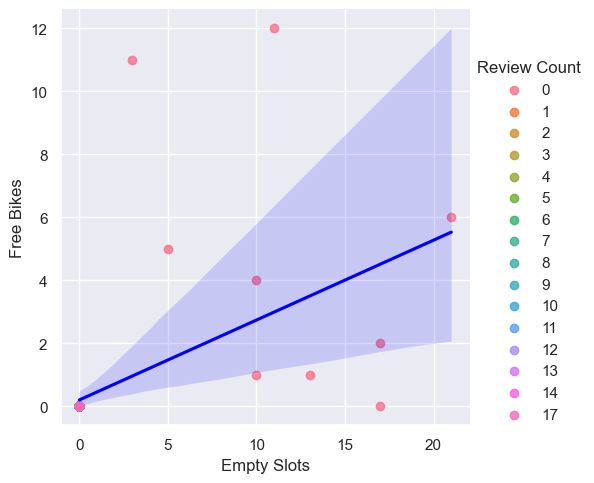

In [199]:
# Let's now visualize our linear regression model using the 3 variables above:

sns.lmplot(x='Empty Slots', y='Free Bikes', hue='Review Count', data=df_city_bikes_recife_network_with_fsq_and_yelp, 
           line_kws={'color':'blue'})
plt.show()


When added the variable *review count* to the equation, it looks like that it follows the line of the variable *empty slots*, with the excpetion of some outliers on the left top of the graph.

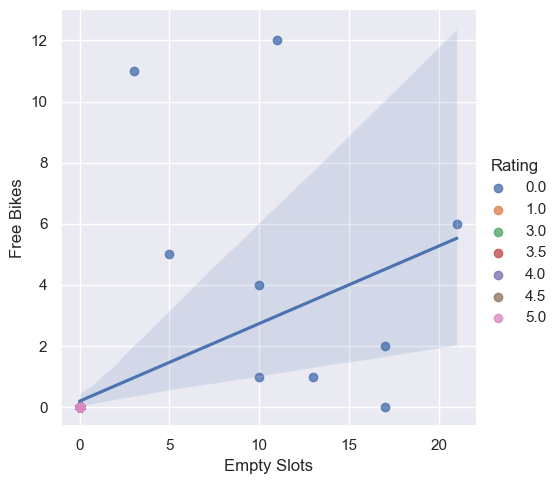

In [202]:
# Let's now visualize our linear regression model using the 3 variables above:

sns.lmplot(x='Empty Slots', y='Free Bikes', hue='Rating', data=df_city_bikes_recife_network_with_fsq_and_yelp)

plt.show()

It is clear from this graph that when *rating* is added as a variable in the equation between *free bikes* and *empty slots*, we can see that the higher the rating of a POI is the number of free bikes available at the station closer by tends to be zero.

In [203]:
# Let's try to do our multiple linear regression model considering one more variable that is "renting bikes":

x = df_city_bikes_recife_network_with_fsq_and_yelp[["Rating", "Review Count", "Empty Slots", "Renting Bikes"]]
y = df_city_bikes_recife_network_with_fsq_and_yelp["Free Bikes"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Free Bikes   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     84.08
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           2.26e-41
Time:                        23:46:19   Log-Likelihood:                -236.37
No. Observations:                 200   AIC:                             482.7
Df Residuals:                     195   BIC:                             499.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.408e-16      0.098  -5.52e-15      1.000      -0.193       0.193
Rating          9.94e-17      0.036   2.73e-15      1.000      -0.072       0.072
Review Count    1.26e-16      0.023   5.38e-15      1.000      -0.046       0.046
Empty Slots      -0.3187      0.049     -6.565      0.000      -0.414      -0.223
Renting Bikes     8.4557      0.643     13.148      0.000       7.187       9.724
==============================================================================
Omnibus:                      196.503   Durbin-Watson:                   2.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15134.169
Skew:                           3.234   Prob(JB):                         0.00
Kurtosis:                      45.122   Cond. No.                         63.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

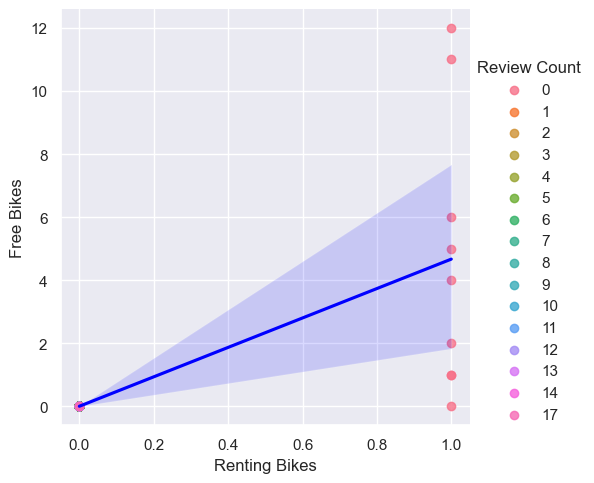

In [208]:
# Let's now visualize our linear regression model using some of the 3 variables above:

sns.lmplot(x='Renting Bikes', y='Free Bikes', hue='Review Count', data=df_city_bikes_recife_network_with_fsq_and_yelp, 
           line_kws={'color':'blue'})
plt.show()


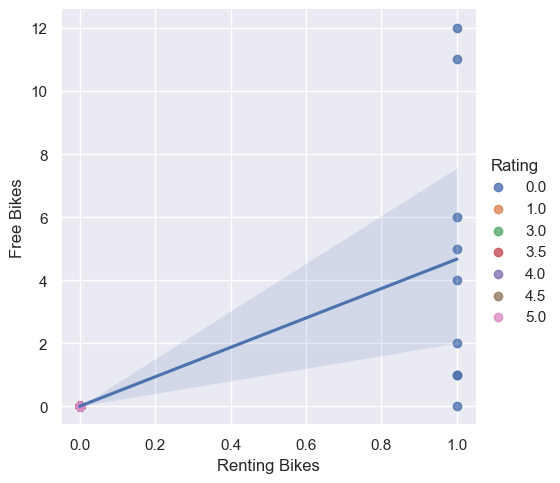

In [206]:
# Let's now visualize our linear regression model using some of the 3 variables above:

sns.lmplot(x='Renting Bikes', y='Free Bikes', hue='Rating', data=df_city_bikes_recife_network_with_fsq_and_yelp)

plt.show()

Those 2 graphs are very similar and indicate a positive correlation between *free bikes* and *renting bikes*, but other than that it is not much more significative to our model as this variable indicates with a 1 if a bike is being rented and with 0 if is not. 

We can see with this model that our adjusted r-squared increased significantly and is 0.625. It is also very similar to the value of our r-square which is 0.633. As we know, r-squared is the measurement of how much of the dependent variable is explained by changes in our independent variables. So a higher adjusted r-squared means that our model fits the data well and we are focusing at this parameter because of the type of linear regression we are using (multivariate). 

So, for multivariate linear regression, it is important to look at the adjusted r-squared instead of the only r-squared. The adjusted R-squared adjusts the R-squared formula based on the number of variables, therefore a lower adjusted score may indicate that some variables are not contributing to your model fit and evaluation.

On the other hand, with this model the p-value of the *rating* and *review count* is higher so it might not be significant to our variable *free bikes*. The p-value column in the model output shows the effect of each variable on the outcome. If a variable has a p-value greater than the threshold value of 0.05, this may indicate that the variable should be removed from the model in order to get a better model fit. So at this point we must evaluate our model to see which variable stays or not.

At the same time, the skew remains to the right side and positive, and the kurtosis (peak) keeps high. And, besides that, our Prob (F-statistic) is 2.26e-41 which give us some indication that our alternative hypothesis might be accepted as it is a very small number.

In summary, the Prob (F-statistic) value of 2.26e-41 suggests that the general regression model that we built is significant and, thus, there is evidence that there is a relationship between the independent and dependent variables in place. Finally, let's add our last variables to see if they are significant to our model: *latitude* and *longitude*.


In [210]:
# Finally let's try to do our multiple linear regression model considering two more variables that are "latitude" and "longitude":

x = df_city_bikes_recife_network_with_fsq_and_yelp[["Rating", "Review Count", "Empty Slots", "Renting Bikes", "Latitude", "Longitude"]]
y = df_city_bikes_recife_network_with_fsq_and_yelp["Free Bikes"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Free Bikes   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     55.48
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           1.91e-39
Time:                        00:08:37   Log-Likelihood:                -236.37
No. Observations:                 200   AIC:                             486.7
Df Residuals:                     193   BIC:                             509.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.183e-11    109.675  -3.81e-13      1.000    -216.316     216.316
Rating         -1.32e-15      0.037  -3.57e-14      1.000      -0.073       0.073
Review Count   -2.88e-15      0.024  -1.22e-13      1.000      -0.047       0.047
Empty Slots      -0.3187      0.049     -6.531      0.000      -0.415      -0.222
Renting Bikes     8.4557    109.677      0.077      0.939    -207.864     224.775
Latitude       1.989e-13      2.304   8.63e-14      1.000      -4.544       4.544
Longitude     -1.245e-12      3.158  -3.94e-13      1.000      -6.228       6.228
==============================================================================
Omnibus:                      196.503   Durbin-Watson:                   2.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15134.169
Skew:                           3.234   Prob(JB):                         0.00
Kurtosis:                      45.122   Cond. No.                     9.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Whith this last model, our Prob (F-statistic) decreased a little bit (1.91e-39). Likewise, our adj r-squared keeps very closer to the one of our previous model (0.622) and similar to our r-quared (0.633). The kurtosis almost hasn't changed and the skew is still to the right side of the graph indicating that our population has a right tail and is not normally distributted.

However, as some of our p-values increased a lot with the exception of *empty slots*, this might not be a good model to be used in our analysis.

# Stretch

*How can you turn the regression model into a classification model?*

To turn a regression model based on the relationship of the free bikes available at the station into a classification model, I would need, initially, to set a threshold value that separates the predicted values into different classes or categories, such as the *rating*, *review count* and *empty slots* which looked variables as good as an indication to the fit of our model.

For example, I could set a threshold value of 0.5 or 1.0 and designate any predicted values greater than 0.5 to one class:

- For *free bikes*: "High availability of free bikes";
- For POIs *rating*: "Excellent", "Very good" etc.;
- For POIs *review count*: "The most reviewed", "Top 10"etc.;
- For *empty slots*: "Maximum capacity of slots available"etc.

And to any other predicted values less than 0.5 to another class:

- For *free bikes*: "Low availability of free bikes";
- For POIs *rating*: "Very bad", "Worse" etc.;
- For POIs *review count*: "No reviews yet", etc.;
- For *empty slots*: "Slots full" etc.

So, with that, I would need to establish my categories with precision or put them in specific bins or "buckets". However, I would need to evaluate the impact of those metrics in my model and, thus, chose them with cautious and theorethical approach to justify my choices based on the context of the project, goals, audience and scenario evaluated.